# Dataset Overview & Clean-up

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
import warnings

from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.exceptions import FitFailedWarning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
df = pd.read_csv('card_transdata.csv')

### Dataset Overview

In [3]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [5]:
df.shape

(1000000, 8)

In [6]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

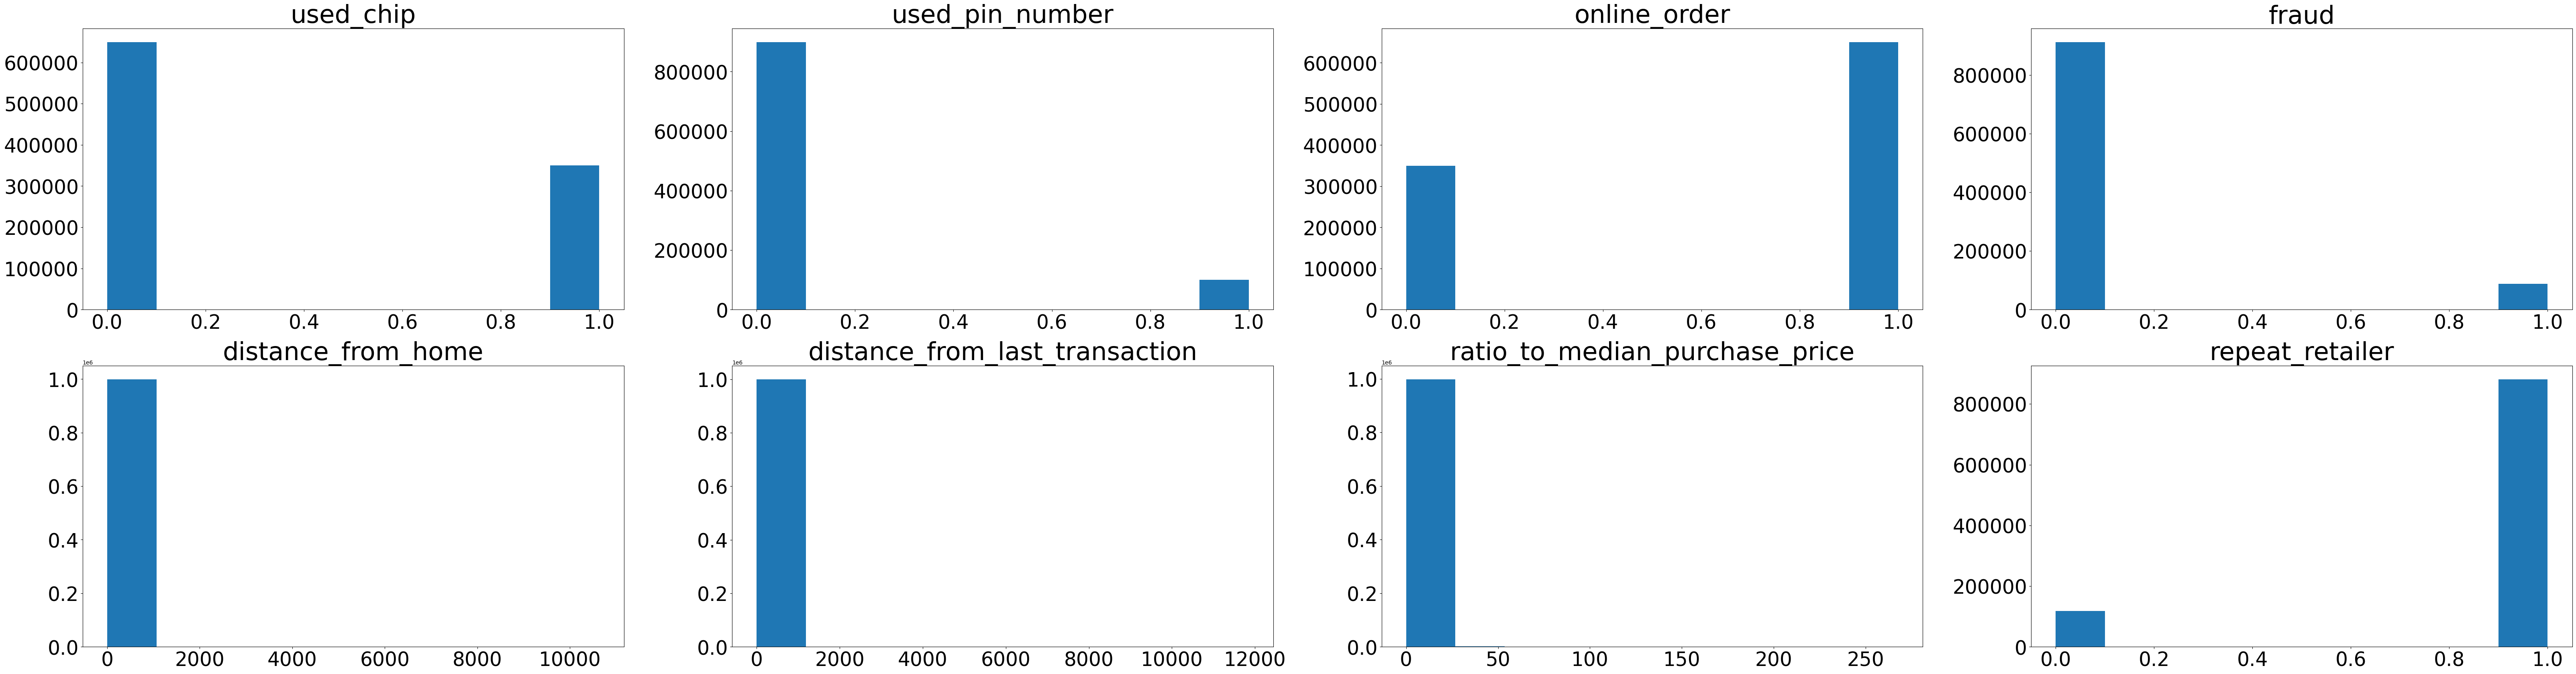

In [8]:
num_cols = len(df.columns)
num_rows = 2
fig, ax = plt.subplots(figsize=(num_cols*10, 20), nrows=num_rows, ncols=int(num_cols/num_rows))
for index, column_name in enumerate(df.columns):
    row = 0 if index+1 > num_cols/num_rows else 1
    col = index % int(num_cols/num_rows)
    ax[row][col].hist(df[column_name]);
    ax[row][col].set_title(column_name, fontsize=45)
    ax[row][col].tick_params(axis='x', labelsize=35)
    ax[row][col].tick_params(axis='y', labelsize=35)

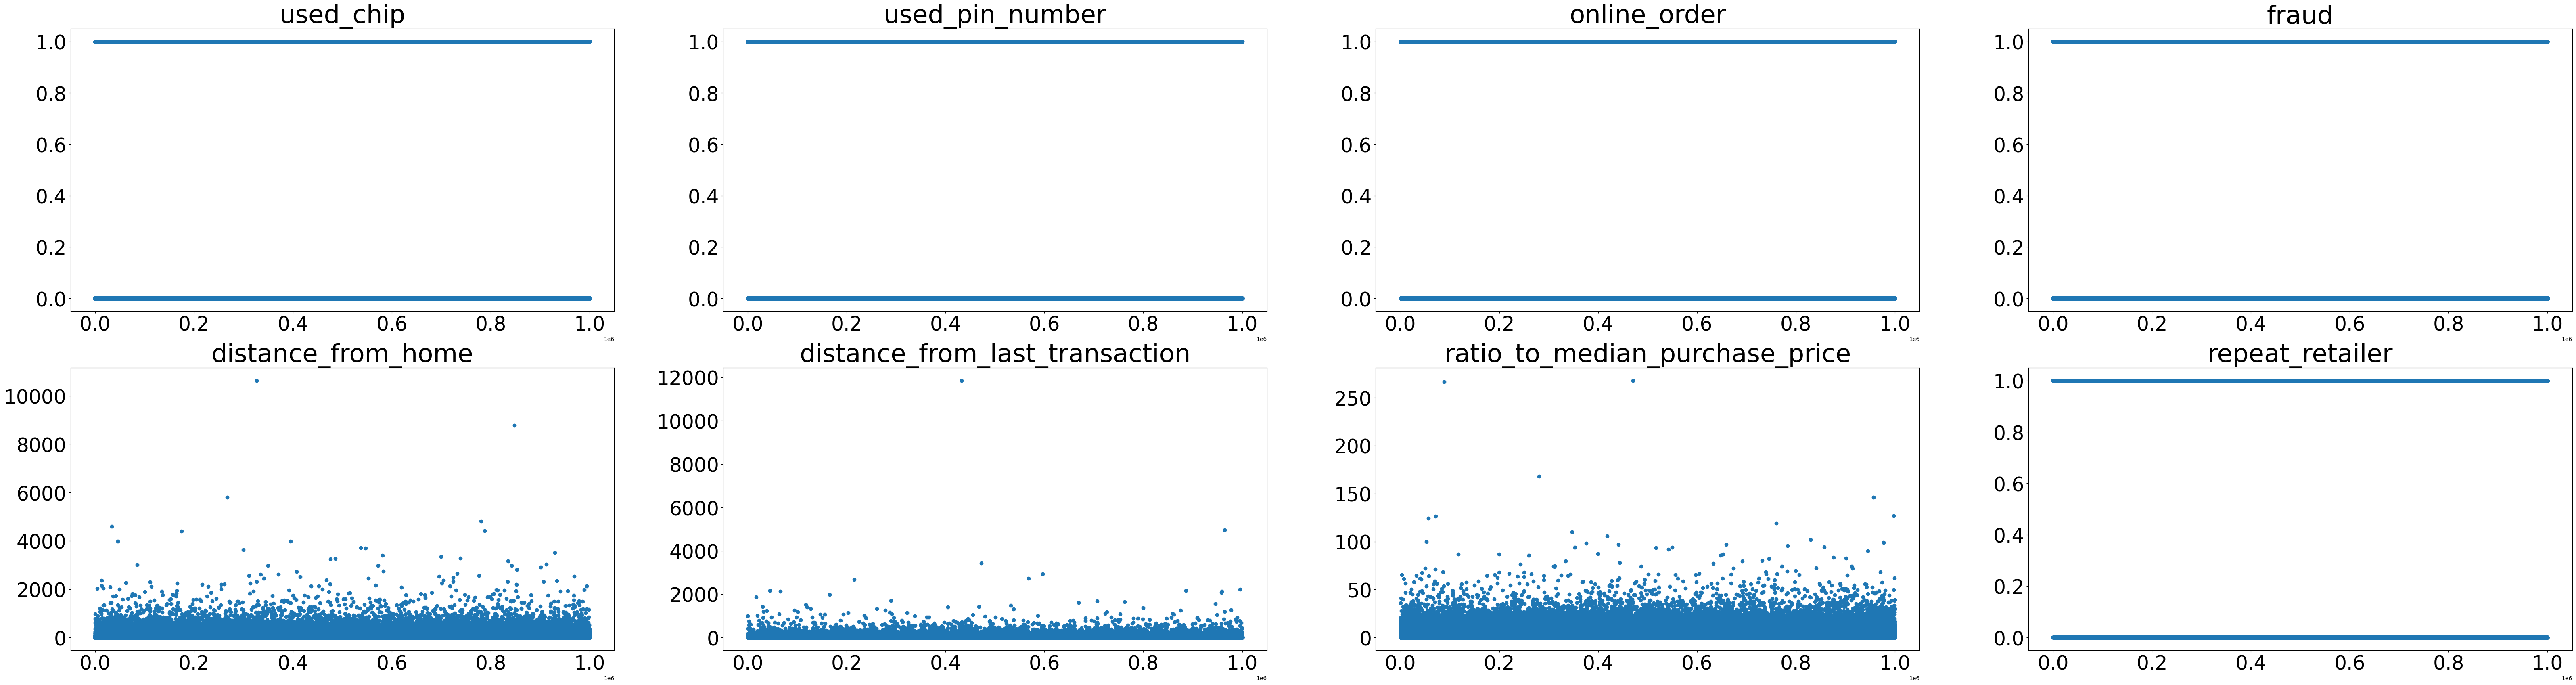

In [9]:
fig, ax = plt.subplots(figsize=(num_cols*10, 20), nrows=num_rows, ncols=int(num_cols/num_rows))
for index, column_name in enumerate(df.columns):
    row = 0 if index+1 > num_cols/num_rows else 1
    col = index % int(num_cols/num_rows)
    ax[row][col].scatter(df.index, df[column_name]);
    ax[row][col].set_title(column_name, fontsize=45)
    ax[row][col].tick_params(axis='x', labelsize=35)
    ax[row][col].tick_params(axis='y', labelsize=35)

### Dataset Clean-up

In [10]:
df.isnull().mean()

distance_from_home                0.0
distance_from_last_transaction    0.0
ratio_to_median_purchase_price    0.0
repeat_retailer                   0.0
used_chip                         0.0
used_pin_number                   0.0
online_order                      0.0
fraud                             0.0
dtype: float64

In [11]:
duplicates = df.duplicated()

In [12]:
df[duplicates].info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              0 non-null      float64
 1   distance_from_last_transaction  0 non-null      float64
 2   ratio_to_median_purchase_price  0 non-null      float64
 3   repeat_retailer                 0 non-null      float64
 4   used_chip                       0 non-null      float64
 5   used_pin_number                 0 non-null      float64
 6   online_order                    0 non-null      float64
 7   fraud                           0 non-null      float64
dtypes: float64(8)
memory usage: 0.0 bytes


# Exploratory Data Analysis

### Comparing dataset values for fraudulent and non-fraudulent transactions

In [13]:
df[df['fraud'] == 1].describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.0
mean,66.261876,12.712185,6.006323,0.880119,0.256399,0.003123,0.946318,1.0
std,134.391608,47.997697,5.564320,0.324825,0.436647,0.055801,0.225391,0.0
min,0.025847,0.000407,0.011966,0.000000,0.000000,0.000000,0.000000,1.0
25%,4.585729,0.328199,3.500270,1.000000,0.000000,0.000000,1.000000,1.0
50%,15.454219,1.157631,5.071294,1.000000,0.000000,0.000000,1.000000,1.0
75%,101.110104,4.598504,7.331222,1.000000,1.000000,0.000000,1.000000,1.0
max,10632.723672,2160.499922,266.689692,1.000000,1.000000,1.000000,1.000000,1.0


In [14]:
df[df['fraud'] == 0].describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,912597.000000,912597.000000,912597.000000,912597.000000,912597.000000,912597.000000,912597.000000,912597.0
mean,22.832976,4.301391,1.423642,0.881672,0.359402,0.109944,0.622225,0.0
std,52.828655,22.472359,1.946152,0.322997,0.479825,0.312821,0.484831,0.0
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.0
25%,3.828942,0.293859,0.449768,1.000000,0.000000,0.000000,0.000000,0.0
50%,9.673847,0.985074,0.913950,1.000000,0.000000,0.000000,1.000000,0.0
75%,24.158057,3.268578,1.788918,1.000000,1.000000,0.000000,1.000000,0.0
max,8777.136420,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,0.0


- higher rate of fraud in larger transactions

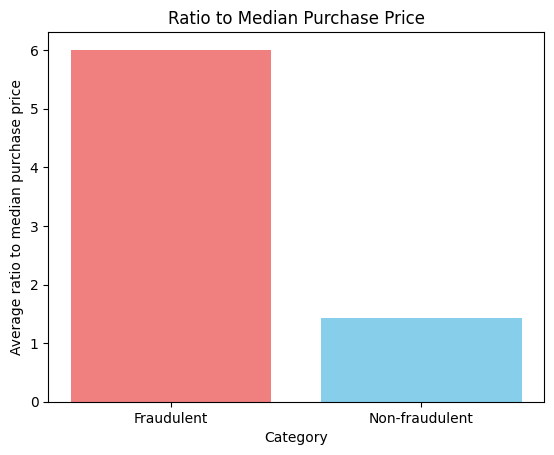

In [15]:
plt.bar(
    ['Fraudulent',  'Non-fraudulent'],
    [
        df[df['fraud'] == 1].describe()['ratio_to_median_purchase_price']['mean'],
        df[df['fraud'] == 0].describe()['ratio_to_median_purchase_price']['mean']
    ],
    color=['lightcoral', 'skyblue']
)
plt.title("Ratio to Median Purchase Price")
plt.xlabel("Category")
plt.ylabel("Average ratio to median purchase price");

### Checking features correlation with target

<Axes: >

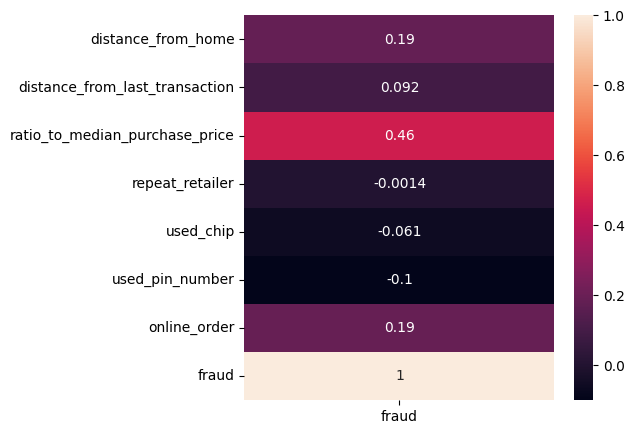

In [16]:
plt.figure(figsize=(5, 5))
sns.heatmap(pd.DataFrame(df.corr()['fraud']), annot=True)

### Comparing security of chip and pin transactions

In [17]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [18]:
df[['used_chip', 'used_pin_number']][df['fraud'] == 1].value_counts(normalize=True)

used_chip  used_pin_number
0.0        0.0                0.740581
1.0        0.0                0.256296
0.0        1.0                0.003020
1.0        1.0                0.000103
Name: proportion, dtype: float64

In [19]:
fraud_num = df['fraud'][df['fraud'] == 1].sum()
no_chip_no_pin_fraud_num = df[(df['used_chip'] == 0) & (df['used_pin_number'] == 0) & (df['fraud'] == 1)].shape[0]
only_chip_fraud_num = df[(df['used_chip'] == 1) & (df['used_pin_number'] == 0) & (df['fraud'] == 1)].shape[0]
only_pin_fraud_num = df[(df['used_chip'] == 0) & (df['used_pin_number'] == 1) & (df['fraud'] == 1)].shape[0]
chip_and_pin_fraud_num = df[(df['used_chip'] == 1) & (df['used_pin_number'] == 1) & (df['fraud'] == 1)].shape[0]

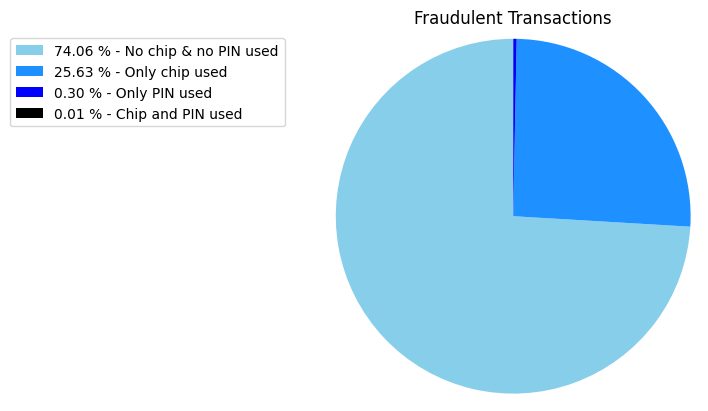

In [20]:
labels = [
    'No chip & no PIN used', 
    'Only chip used', 
    'Only PIN used', 
    'Chip and PIN used']
sizes = np.array([
    no_chip_no_pin_fraud_num, 
    only_chip_fraud_num, 
    only_pin_fraud_num, 
    chip_and_pin_fraud_num
])
colors = ['skyblue', 'dodgerblue', 'blue', 'black']
percent = 100.*sizes/sizes.sum()
labels = ['{1:2.2f} % - {0}'.format(i,j) for i,j in zip(labels, percent)]
patches, texts = plt.pie(sizes, colors=colors, startangle=90, radius=1.2)
plt.title("Fraudulent Transactions")
plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=10)
plt.show();

### Comparing fraudulent and non-fraudulent cases for online transactions

In [21]:
online_order_grp = df.groupby('online_order')

In [22]:
online_order_grp.fraud.value_counts()

online_order  fraud
0.0           0.0      344756
              1.0        4692
1.0           0.0      567841
              1.0       82711
Name: count, dtype: int64

In [23]:
online_order_grp.fraud.value_counts(normalize=True)

online_order  fraud
0.0           0.0      0.986573
              1.0      0.013427
1.0           0.0      0.872860
              1.0      0.127140
Name: proportion, dtype: float64

- the fraud percantage is significantly higher for online transactions (offline: 1.34%, online: 12.71%)

### Checking feature importance

In [24]:
X = df.drop(columns=['fraud'])
y = df['fraud']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
feature_selector = RandomForestClassifier(random_state=42)
feature_selector.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
pd.Series(feature_selector.feature_importances_, index=X.columns).sort_values(ascending=False)

ratio_to_median_purchase_price    0.527171
online_order                      0.169382
distance_from_home                0.134910
used_pin_number                   0.063928
used_chip                         0.052078
distance_from_last_transaction    0.045711
repeat_retailer                   0.006820
dtype: float64

In [27]:
X_train.columns[feature_selector.feature_importances_.argsort()[::-1]]

Index(['ratio_to_median_purchase_price', 'online_order', 'distance_from_home',
       'used_pin_number', 'used_chip', 'distance_from_last_transaction',
       'repeat_retailer'],
      dtype='object')

- ratio_to_median_purchase_price, online_order, and distance_from_home are most correlated with the fraud based on RandomForestClassifier, which aligns with correlation values seen in the heatmap above

# Building And Evaluating Models

### Logistic Regression

- #### baseline (imbalanced dataset)

In [28]:
X = df.drop(columns=['fraud'])
y = df['fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
start_time = time.time()

In [31]:
lr_model = LogisticRegression(max_iter=1000, n_jobs=-1, random_state=42)
lr_model.fit(X_train_scaled, y_train)
y_pred = lr_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182557
         1.0       0.89      0.60      0.72     17443

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.96    200000



In [32]:
f"Elapsed time: {round(time.time() - start_time, 2)} s"

'Elapsed time: 1.48 s'

---

- #### baseline (balanced dataset)

In [33]:
non_fraud_df = df[df['fraud'] == 0]
fraud_df = df[df['fraud'] == 1]
balanced_df_size = fraud_df.shape[0]*2
non_fraud_category_size = 0.5
fraud_category_size = round(1 - non_fraud_category_size, 2)
non_fraud_sampled_df = non_fraud_df.sample(int(balanced_df_size*non_fraud_category_size), random_state=42)
fraud_sampled_df = fraud_df.sample(int(balanced_df_size*fraud_category_size), random_state=42)
df_balanced = pd.concat([non_fraud_sampled_df, fraud_sampled_df])
df_balanced = df_balanced.sample(balanced_df_size, random_state=42)  # shuffles df

X_balanced = df_balanced.drop(columns=['fraud'])
y_balanced = df_balanced['fraud']

X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, y_balanced, test_size=0.2, stratify=y_balanced, random_state=42
)

scaler = StandardScaler()
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)
X_test_balanced_scaled = scaler.transform(X_test_balanced)

In [34]:
start_time = time.time()

In [35]:
lr_model = LogisticRegression(max_iter=1000, n_jobs=-1, random_state=42)
lr_model.fit(X_train_balanced_scaled, y_train_balanced)
y_pred = lr_model.predict(X_test_balanced_scaled)
print(classification_report(y_test_balanced, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     17481
         1.0       0.93      0.95      0.94     17481

    accuracy                           0.94     34962
   macro avg       0.94      0.94      0.94     34962
weighted avg       0.94      0.94      0.94     34962



In [36]:
f"Elapsed time: {round(time.time() - start_time, 2)} s"

'Elapsed time: 0.55 s'

---

- #### hyperparameter tuning (grid search)

In [37]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'class_weight': [None, 'balanced', {0: 1, 1: 3}, {0: 1, 1: 5}],
    'tol': [1e-4, 1e-3, 1e-2],
    'fit_intercept': [True, False],
}

In [38]:
start_time = time.time()

In [39]:
warnings.filterwarnings("ignore", category=FitFailedWarning)
warnings.filterwarnings("ignore", category=UserWarning)

model = LogisticRegression(max_iter=1000, n_jobs=-1, random_state=42)

optimizer = GridSearchCV(model, param_grid, cv=3, scoring='recall')
optimizer.fit(X_train_balanced_scaled, y_train_balanced)
print(optimizer.best_score_)
print(optimizer.best_params_)
best_model = optimizer.best_estimator_

warnings.resetwarnings()

0.9944938570219533
{'C': 0.1, 'class_weight': {0: 1, 1: 5}, 'fit_intercept': True, 'penalty': 'l2', 'tol': 0.0001}


In [40]:
y_pred = best_model.predict(X_test_balanced_scaled)
print(classification_report(y_test_balanced, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92     17481
         1.0       0.87      0.99      0.93     17481

    accuracy                           0.93     34962
   macro avg       0.93      0.93      0.93     34962
weighted avg       0.93      0.93      0.93     34962



In [41]:
f"Elapsed time: {round(time.time() - start_time, 2)} s"

'Elapsed time: 247.54 s'

In [42]:
start_time = time.time()

In [43]:
warnings.filterwarnings("ignore", category=FitFailedWarning)
warnings.filterwarnings("ignore", category=UserWarning)

model = LogisticRegression(max_iter=1000, n_jobs=-1, random_state=42)

optimizer = GridSearchCV(model, param_grid, cv=3, scoring='f1')
optimizer.fit(X_train_balanced_scaled, y_train_balanced)
print(optimizer.best_score_)
print(optimizer.best_params_)
best_model = optimizer.best_estimator_

warnings.resetwarnings()

0.9445524758226053
{'C': 1, 'class_weight': {0: 1, 1: 3}, 'fit_intercept': False, 'penalty': 'l2', 'tol': 0.0001}


In [44]:
y_pred = best_model.predict(X_test_balanced_scaled)
print(classification_report(y_test_balanced, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.91      0.94     17481
         1.0       0.92      0.97      0.94     17481

    accuracy                           0.94     34962
   macro avg       0.94      0.94      0.94     34962
weighted avg       0.94      0.94      0.94     34962



In [45]:
f"Elapsed time: {round(time.time() - start_time, 2)} s"

'Elapsed time: 255.9 s'

### Support Vector Machines

- #### baseline (imbalanced dataset)

In [46]:
X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(
    X, y, train_size=30000, test_size=30000, stratify=y, random_state=42
)

In [47]:
scaler = StandardScaler()
X_train_sampled_scaled = scaler.fit_transform(X_train_sampled)
X_test_sampled_scaled = scaler.transform(X_test_sampled)

In [48]:
start_time = time.time()

In [49]:
svc_model = SVC(kernel='linear', probability=True, random_state=42)
cal_svc_model = CalibratedClassifierCV(svc_model)
cal_svc_model.fit(X_train_sampled_scaled, y_train_sampled)
y_pred = cal_svc_model.predict(X_test_sampled_scaled)
print(classification_report(y_test_sampled, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     27378
         1.0       0.90      0.57      0.69      2622

    accuracy                           0.96     30000
   macro avg       0.93      0.78      0.84     30000
weighted avg       0.95      0.96      0.95     30000



In [50]:
f"Elapsed time: {round(time.time() - start_time, 2)} s"

'Elapsed time: 51.8 s'

---

- #### baseline (balanced dataset)

In [51]:
non_fraud_df = df[df['fraud'] == 0]
fraud_df = df[df['fraud'] == 1]
balanced_df_size = 30000
non_fraud_category_size = 0.5
fraud_category_size = round(1 - non_fraud_category_size, 2)
non_fraud_sampled_df = non_fraud_df.sample(int(balanced_df_size*non_fraud_category_size), random_state=42)
fraud_sampled_df = fraud_df.sample(int(balanced_df_size*fraud_category_size), random_state=42)
df_balanced = pd.concat([non_fraud_sampled_df, fraud_sampled_df])
df_balanced = df_balanced.sample(balanced_df_size, random_state=42)  # shuffles df

X_balanced = df_balanced.drop(columns=['fraud'])
y_balanced = df_balanced['fraud']

X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, y_balanced, test_size=0.2, stratify=y_balanced, random_state=42
)

scaler = StandardScaler()
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)
X_test_balanced_scaled = scaler.transform(X_test_balanced)

In [52]:
start_time = time.time()

In [53]:
print(
    f"""
    balanced_df_size: {balanced_df_size} 
    non_fraud_category_size: {non_fraud_category_size}
    fraud_category_size: {fraud_category_size}
    """
)


    balanced_df_size: 30000 
    non_fraud_category_size: 0.5
    fraud_category_size: 0.5
    


In [54]:
svc_model = SVC(kernel='linear', probability=True, random_state=42)
cal_svc_model = CalibratedClassifierCV(svc_model)
cal_svc_model.fit(X_train_balanced_scaled, y_train_balanced)
y_pred = cal_svc_model.predict(X_test_balanced_scaled)
print(classification_report(y_test_balanced, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      3000
         1.0       0.94      0.96      0.95      3000

    accuracy                           0.95      6000
   macro avg       0.95      0.95      0.95      6000
weighted avg       0.95      0.95      0.95      6000



In [55]:
f"Elapsed time: {round(time.time() - start_time, 2)} s"

'Elapsed time: 45.38 s'

---

- #### hyperparameter tuning (grid search)

In [56]:
non_fraud_df = df[df['fraud'] == 0]
fraud_df = df[df['fraud'] == 1]
balanced_df_size = 10000
non_fraud_category_size = 0.5
fraud_category_size = round(1 - non_fraud_category_size, 2)
non_fraud_sampled_df = non_fraud_df.sample(int(balanced_df_size*non_fraud_category_size), random_state=42)
fraud_sampled_df = fraud_df.sample(int(balanced_df_size*fraud_category_size), random_state=42)
df_balanced = pd.concat([non_fraud_sampled_df, fraud_sampled_df])
df_balanced = df_balanced.sample(balanced_df_size, random_state=42)  # shuffles df

X_balanced = df_balanced.drop(columns=['fraud'])
y_balanced = df_balanced['fraud']

X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, y_balanced, test_size=0.2, stratify=y_balanced, random_state=42
)

scaler = StandardScaler()
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)
X_test_balanced_scaled = scaler.transform(X_test_balanced)

In [57]:
param_grid = {
    'base_estimator__C': [0.1, 1, 10],
    'base_estimator__kernel': ['linear', 'rbf'],
    'base_estimator__gamma': ['scale', 'auto', 0.1],
    'base_estimator__degree': [2, 3, 4],
    'base_estimator__class_weight': [None, 'balanced', {0: 1, 1: 3}, {0: 1, 1: 5}]
}

In [58]:
start_time = time.time()

In [59]:
warnings.filterwarnings("ignore", category=FutureWarning)
# /home/bugi/.pyenv/versions/data-science-pro/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 
# 'base_estimator' of CalibratedClassifierCV is deprecated in favor of 'estimator'. See CalibratedClassifierCV's docstring for more details.
  # estimator = estimator.set_params(**clone(parameters, safe=False))

svc_model = SVC()
cal_svc_model = CalibratedClassifierCV(svc_model)

optimizer = GridSearchCV(
    cal_svc_model,
    param_grid,
    cv=3,
    scoring='recall'
)
optimizer.fit(X_train_balanced_scaled, y_train_balanced)

warnings.resetwarnings()

In [60]:
print(optimizer.best_params_)
print(optimizer.best_score_)
best_model = optimizer.best_estimator_

{'base_estimator__C': 10, 'base_estimator__class_weight': {0: 1, 1: 3}, 'base_estimator__degree': 2, 'base_estimator__gamma': 'scale', 'base_estimator__kernel': 'rbf'}
0.9952501243751718


In [61]:
y_pred = best_model.predict(X_test_balanced_scaled)
print(classification_report(y_test_balanced, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      1000
         1.0       0.98      1.00      0.99      1000

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



In [62]:
f"Elapsed time: {round(time.time() - start_time, 2)} s"

'Elapsed time: 442.43 s'

In [63]:
start_time = time.time()

In [64]:
warnings.filterwarnings("ignore", category=FutureWarning)
# /home/bugi/.pyenv/versions/data-science-pro/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 
# 'base_estimator' of CalibratedClassifierCV is deprecated in favor of 'estimator'. See CalibratedClassifierCV's docstring for more details.
  # estimator = estimator.set_params(**clone(parameters, safe=False))

svc_model = SVC()
cal_svc_model = CalibratedClassifierCV(svc_model)

optimizer = GridSearchCV(
    cal_svc_model,
    param_grid,
    cv=3,
    scoring='f1'
)
optimizer.fit(X_train_balanced_scaled, y_train_balanced)

warnings.resetwarnings()

In [65]:
print(optimizer.best_params_)
print(optimizer.best_score_)
best_model = optimizer.best_estimator_

{'base_estimator__C': 10, 'base_estimator__class_weight': {0: 1, 1: 3}, 'base_estimator__degree': 2, 'base_estimator__gamma': 'scale', 'base_estimator__kernel': 'rbf'}
0.9868676145764784


In [66]:
y_pred = best_model.predict(X_test_balanced_scaled)
print(classification_report(y_test_balanced, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      1000
         1.0       0.98      1.00      0.99      1000

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



In [67]:
f"Elapsed time: {round(time.time() - start_time, 2)} s"

'Elapsed time: 437.06 s'

### DecisionTreeClassifier

In [68]:
start_time = time.time()

In [69]:
dtc_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dtc_model.fit(X_train, y_train)
y_pred = dtc_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182557
         1.0       0.99      1.00      0.99     17443

    accuracy                           1.00    200000
   macro avg       0.99      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



In [70]:
f"Elapsed time: {round(time.time() - start_time, 2)} s"

'Elapsed time: 2.03 s'

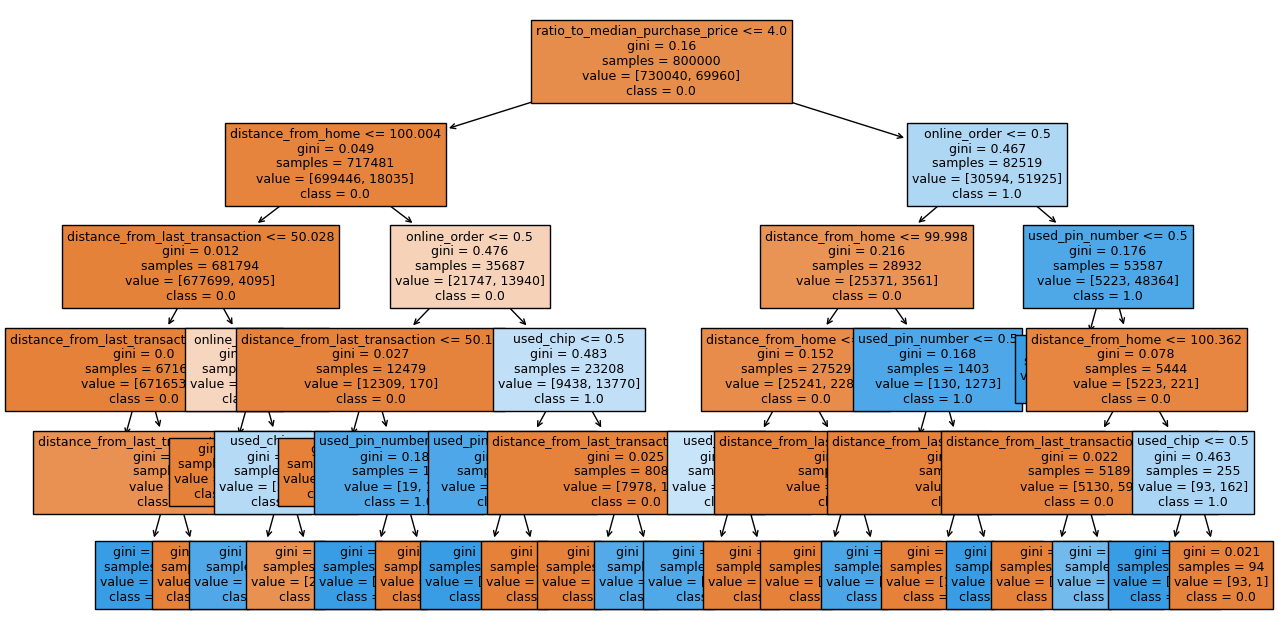

In [71]:
plt.figure(figsize=(15, 8))
plot_tree(
    dtc_model, 
    filled=True, 
    feature_names=list(dtc_model.feature_names_in_), 
    class_names=list(dtc_model.classes_.astype('str'))
)
for text in plt.gca().get_children():
    if isinstance(text, plt.Text):
        text.set_fontsize(9)
plt.show();

### RandomForestClassifier

In [72]:
start_time = time.time()

In [73]:
rfc_model = RandomForestClassifier(random_state=42, n_jobs=-1)
rfc_model.fit(X_train, y_train)
y_pred = rfc_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182557
         1.0       1.00      1.00      1.00     17443

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



In [74]:
f"Elapsed time: {round(time.time() - start_time, 2)} s"

'Elapsed time: 9.28 s'